# Livrable 2 

## I. Introduction

Dans le cadre de notre engagement continu envers des solutions de mobilité urbaine durable, ce livrable se concentre sur l'avancement de notre projet initié en réponse à l'appel de l'Agence de l’Environnement et de la Maîtrise de l’Énergie (ADEME). L'objectif principal reste de développer des méthodes efficaces pour optimiser les tournées de livraison en milieu urbain, en réduisant la consommation énergétique et les émissions de CO2, tout en maintenant ou en améliorant les niveaux de service.

### Contexte

La nécessité de solutions innovantes pour la gestion de la logistique urbaine devient de plus en plus impérative face aux défis environnementaux actuels. Les villes, confrontées à l'augmentation des coûts de transport et aux impacts environnementaux néfastes, cherchent des moyens de gérer efficacement le trafic et de réduire les émissions polluantes. Notre projet vise à répondre à ces défis en utilisant des techniques algorithmiques avancées pour planifier de manière optimale les tournées des véhicules de livraison.

### Objectifs du Livrable

Ce deuxième livrable vise à étendre notre modèle initial en intégrant des algorithmes plus sophistiqués et des heuristiques pour améliorer la résolution du problème de tournées de véhicules (Vehicle Routing Problem, VRP). Nous explorerons comment différentes approches peuvent contribuer à une plus grande efficacité logistique et à une réduction des impacts environnementaux :
- **Développement et implémentation de nouveaux algorithmes** : Nous introduirons de nouvelles méthodes de résolution qui prennent en compte des contraintes additionnelles telles que les fenêtres de temps et les capacités variables des véhicules.
- **Analyse de la complexité et optimisation des performances** : Évaluation de la complexité des nouvelles approches et optimisation de leur performance pour des instances de grande taille.
- **Validation expérimentale** : Tests des algorithmes sur des scénarios réalistes pour valider leur efficacité et leur applicabilité en conditions réelles.

L'accent sera mis sur la robustesse des solutions proposées et leur capacité à s'adapter à diverses conditions opérationnelles, en visant une amélioration tangible des performances par rapport aux solutions existantes.

### Choix des Algorithmes

Nous avons sélectionné trois algorithmes distincts pour aborder le problème des tournées de véhicules (VRP) : l'algorithme de PSO (Particle Swarm Optimization), l'algorithme de Dijkstra et l'optimisation avec PuLP et le solveur Simplex. Ce choix repose sur plusieurs considérations :
1. **Complémentarité des Méthodes** : Chaque algorithme apporte des forces différentes. PSO est efficace pour trouver rapidement des solutions de bonne qualité pour des instances de taille moyenne à grande, Dijkstra est utile pour déterminer les chemins les plus courts, et PuLP avec le solveur Simplex permet de vérifier la qualité des solutions trouvées par les heuristiques en fournissant des solutions optimales pour des instances plus petites.
2. **Robustesse et Flexibilité** : En utilisant une combinaison de méthodes heuristiques et exactes, nous pouvons obtenir des solutions robustes et flexibles qui s'adaptent à divers scénarios et contraintes logistiques.
3. **Validation et Comparaison** : L'utilisation de plusieurs algorithmes permet de valider les résultats obtenus, d'identifier les points forts et les faiblesses de chaque méthode, et d'améliorer continuellement les approches.


## II. Développement Algorithmique

Cette section détaille les techniques et algorithmes utilisés pour optimiser les tournées de livraison, tout en mettant l'accent sur la minimisation de la distance parcourue, sans intégration systématique des contraintes de capacité des véhicules ou des fenêtres de temps pour simplifier la comparaison entre les méthodes.

### Objectifs et Contraintes

#### Objectif :
$$\min \sum_{i=0}^k d_{ij} x_{ij}$$
- **Minimiser** le coût total des tournées, principalement représenté par la distance parcourue et le temps de trajet. L'objectif est de réduire l'impact environnemental en diminuant la distance totale parcourue par les véhicules.

#### Contraintes :
$$\sum_{j=1}^n x_{ij} = 1 \quad \forall i \in V$$
$$\sum_{i=1}^n x_{ij} = 1 \quad \forall j \in V$$
$$x_{ij} \in \{0,1\}$$
- **Unicité de Visite** : Chaque ville doit être visitée exactement une fois pour assurer que toutes les livraisons nécessaires sont effectuées.
- **Continuité** : Assurer que si une ville \( j \) est visitée immédiatement après une ville \( i \), alors le trajet de \( i \) à \( j \) doit être inclus dans la tournée.

### Description des Algorithmes

**1. Optimisation par essaim particulaire (PSO) pour le VRP**
- **Objectif** : Minimiser le coût total des tournées, en se concentrant uniquement sur la distance parcourue.
- **Méthode** : Utilisation de la technique d'optimisation par essaim particulaire, adaptée au problème de tournées de véhicules sans considération des capacités ou des fenêtres de temps.
- **Pseudocode** :
  - Initialiser la population de particules (solutions potentielles).
  - Répéter jusqu'à convergence :
    - Évaluer la fitness (coût de la tournée) de chaque particule.
    - Mettre à jour les meilleurs scores et positions.
    - Ajuster les positions des particules en fonction des meilleurs scores.
  - Retourner la meilleure solution trouvée.

**2. Algorithme de Dijkstra pour la minimisation du temps de parcours**
- **Objectif** : Optimiser les itinéraires en minimisant le temps de parcours total.
- **Méthode** : Adaptation de l'algorithme de Dijkstra, simplifiée pour ne pas prendre en compte les fenêtres de temps ou les capacités.
- **Pseudocode** :
  - Pour chaque véhicule, appliquer Dijkstra modifié pour calculer le chemin optimal.
  - Répéter jusqu'à ce que toutes les destinations soient desservies.
  - Calculer et retourner le coût total du parcours.

**3. Modélisation et optimisation avec PuLP et Solveur Simplex**
- **Objectif** : Trouver des solutions optimales pour les tournées de véhicules en minimisant la distance totale parcourue.
- **Méthode** : Utilisation de la programmation linéaire pour modéliser le problème et le résoudre à l'aide du solveur Simplex sans intégrer les contraintes de capacité.
- **Pseudocode** :
  - Définir les variables de décision et les contraintes du problème.
  - Formuler la fonction objectif (minimisation de la distance totale).
  - Résoudre le problème avec le solveur Simplex.
  - Extraire et retourner les routes optimales.

### Analyse de la Complexité

L'analyse de la complexité des algorithmes est essentielle pour évaluer leur efficacité et leur faisabilité pour des instances de différentes tailles.

#### Complexité Temporelle

**1. Optimisation par essaim particulaire (PSO)**
- **Complexité Temporelle** : La complexité temporelle du PSO est `O(g * (s + k * c) + p * i)`, où `g` représente le nombre de générations, `s` la taille de la population, `k` le nombre de véhicules, `c` le coût de calcul de la fitness pour une solution, `p` le nombre de particules, et `i` le nombre d'itérations par particule.

**2. Algorithme de Dijkstra**
- **Complexité Temporelle** : La complexité temporelle de l'algorithme de Dijkstra, dans le contexte de la minimisation du temps de parcours pour le VRP et sans considération pour les fenêtres de temps et capacités des véhicules, reste `O((V + E) * log(V))` pour chaque véhicule, où `V` est le nombre de sommets et `E` le nombre d'arêtes.

**3. Optimisation avec PuLP et le Solveur Simplex**
- **Complexité Temporelle** : La résolution du problème VRP avec PuLP et le solveur Simplex a une complexité qui peut être considérée comme `O(n^3)` dans le cas général, dépendant de la méthode de résolution utilisée par le solveur linéaire, où `n` est le nombre de variables et de contraintes.

#### Complexité Spatiale

**1. Optimisation par essaim particulaire (PSO)**
- **Complexité Spatiale** : La complexité spatiale est principalement due au stockage des particules, qui est `O(s * k)`, avec `s` représentant la taille de la population et `k` le nombre de véhicules.

**2. Algorithme de Dijkstra**
- **Complexité Spatiale** : La complexité spatiale de Dijkstra est `O(V + E)` pour le stockage du graphe plus `O(V)` pour stocker les états intermédiaires utilisés dans l'algorithme.

**3. Optimisation avec PuLP et le Solveur Simplex**
- **Complexité Spatiale** : La complexité spatiale de cette approche dépend de la taille du problème linéaire, avec une complexité approximative de `O(n^2)` pour le stockage des variables et des contraintes.

### Implications Pratiques

Ces analyses montrent que bien que les algorithmes soient adaptés pour des instances de taille petite à moyenne, le coût de calcul peut devenir prohibitif pour de très grandes instances. Pour surmonter ces défis, l'utilisation de techniques de parallélisme ou l'application de heuristiques supplémentaires peut être nécessaire pour améliorer les performances. Les heuristiques initiales efficaces peuvent également réduire le temps de calcul en fournissant des solutions de départ proches de l'optimal, nécessitant moins d'itérations pour converger.


## III. Implémentation

L'implémentation des algorithmes choisis pour ce projet est réalisée en Python, utilisant principalement les bibliothèques NetworkX pour la gestion des graphes et NumPy pour les calculs numériques. Nous proposons deux méthodes de modélisation de graphes, chacune adaptée à différents objectifs de simulation. Il est important de sélectionner et d'utiliser uniquement une des deux méthodes pour éviter des conflits dans la gestion des données.

In [ ]:
pip install -r requirements.txt

### Choix de la Modélisation du Graphe

Avant de procéder à l'implémentation, veuillez choisir entre :

1. Génération et Modélisation du Graphe en mode aléatoire : Cette méthode est recommandée pour des tests dynamiques et des analyses de robustesse. Elle génère un graphe aléatoire où les nœuds et les arêtes sont créés avec des attributs aléatoires.

2. Modélisation du Graphe basée sur le Projet : Cette méthode utilise un graphe prédéfini qui imite une structure réelle ou un cas d'étude spécifique. Elle est utile pour des simulations qui nécessitent un environnement contrôlé ou des données spécifiques.

Assurez-vous de ne lancer que le bloc de code correspondant au choix de la modélisation du graphe pour éviter tout conflit de données ou d'exécution.

### 1. Génération et Modélisation du Graphe en mode aléatoire
Ce modèle génère un graphe où les nœuds représentent des entités telles que des utilisateurs ou des villes, et les arêtes des connexions avec des poids symbolisant des distances ou des coûts de transport. Voici un exemple de code pour générer un tel graphe :

Nombre de véhicules utilisés : 2


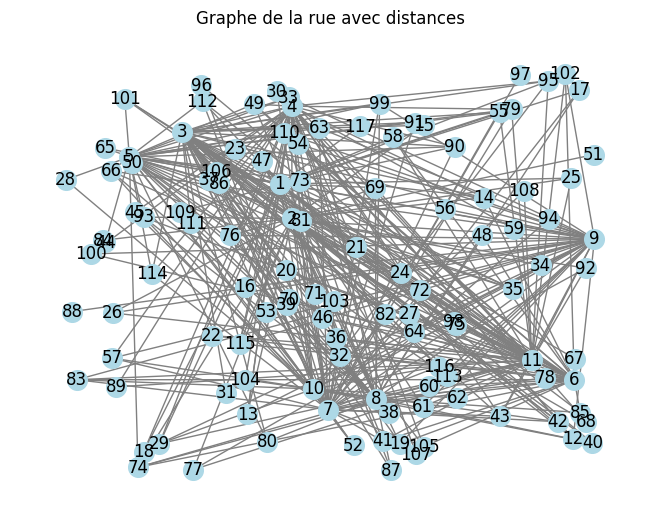

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Création du graphe
G = nx.Graph()

# Ajout des utilisateurs
randomNumber = random.randint(100, 120)
users = list(range(1, randomNumber + 1))

# Ajout des nœuds dans le graphe
G.add_nodes_from(users)

# Génération des positions aléatoires pour les utilisateurs
positions = {user: (random.uniform(0, 500), random.uniform(0, 500)) for user in users}

# Ajout des amitiés avec distances basées sur les positions
for i in range(randomNumber):
    numFriends = random.randint(1, 5)  # Chaque utilisateur aura entre 1 et 5 amis
    for _ in range(numFriends):
        while True:
            friend = random.randint(1, int(randomNumber/10))
            if friend != i + 1 and not G.has_edge(i + 1, friend):
                # Calcul de la distance euclidienne entre les positions
                pos_i = positions[i + 1]
                pos_friend = positions[friend]
                distance = np.sqrt((pos_i[0] - pos_friend[0]) ** 2 + (pos_i[1] - pos_friend[1]) ** 2)
                G.add_edge(i + 1, friend, weight=distance)
                break


# Nombre aléatoire de véhicules
num_vehicles = random.randint(2, 5)  
G.graph['num_vehicles'] = num_vehicles

# Affichage des capacités des véhicules et demandes des villes
print("Nombre de véhicules utilisés :", G.graph['num_vehicles'])

# Visualisation du graphe
nx.draw(G, positions, with_labels=True, node_color='lightblue', node_size=200, edge_color='gray')
plt.title("Graphe de la rue avec distances")
plt.show()

# Calcul de la matrice des distances
distances = nx.floyd_warshall_numpy(G)
# print("Matrice des distances:\n", distances)

### 2. Modélisation du Graphe du Projet

Le code ci-dessous est un exemple de création de graphe dans les conditions de base de notre énoncé. On y retrouve chaque ville avec les liens établis entre chacune d'elles.


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import heapq
import pulp

# Génération du graphe initial
G = nx.Graph()

users = ["A", "F(Rose/Violet)", "B(Rose/Violet)", "C(Violet)", "D(Rose/Violet)", "E(Violet)", "F(Rose/Violet)", "G(Violet)",
         "E(Rose)","D(Rose)","C(Rose)","B(Rose/Vert)","D(Rose/Vert)",
         "B(Vert)","C(Vert)","E(Vert)","F(Vert)","G(Vert)","H(Vert)","I(Vert)","J(Vert)","K(Vert)","L(Vert)",
         "H(Bleu)","G(Bleu)","F(Bleu)","E(Bleu)","D(Bleu)","C(Bleu)","B(Bleu)"]
G.add_nodes_from(users)

demand_range = (5, 10)
for user in G.nodes():
    G.nodes[user]['demand'] = random.randint(*demand_range)  

friendships = [("A", "F(Rose/Violet)"), ("A", "B(Vert)"), ("A", "L(Vert)"),("A", "H(Bleu)"),("A", "B(Bleu)"),("A", "D(Rose/Violet)"),("A", "G(Violet)"),
               ("F(Rose/Violet)", "B(Rose/Violet)"), ("B(Rose/Violet)", "C(Violet)"), ("B(Rose/Violet)", "D(Rose/Violet)"), ("C(Violet)", "D(Rose/Violet)"),
               ("D(Rose/Violet)", "E(Violet)"), ("E(Violet)", "F(Rose/Violet)"),("D(Rose/Violet)", "F(Rose/Violet)"),("F(Rose/Violet)","E(Rose)"),
               ("E(Rose)","D(Rose)"),("D(Rose)","C(Rose)"),("C(Rose)","B(Rose/Vert)"),
               ("B(Rose/Vert)", "D(Rose/Vert)"), ("D(Rose/Vert)", "C(Vert)"), ("C(Vert)", "B(Vert)"),
               ("L(Vert)", "K(Vert)"), ("K(Vert)", "J(Vert)"), ("J(Vert)", "I(Vert)"), ("I(Vert)", "H(Vert)"), 
               ("H(Vert)", "G(Vert)"), ("G(Vert)", "F(Vert)"), ("F(Vert)", "E(Vert)"), ("E(Vert)", "B(Rose/Vert)"),
               ("H(Bleu)", "G(Bleu)"),("G(Bleu)", "F(Bleu)"),("F(Bleu)", "E(Bleu)"),("E(Bleu)", "D(Bleu)"),
               ("D(Bleu)", "G(Bleu)"),("C(Bleu)", "B(Bleu)"),
               ]

G.add_edges_from(friendships)

# Ajouter des poids aux arêtes
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.randint(1, 10)

# Définir les capacités des véhicules
G.graph['num_vehicles'] = 2
G.graph['vehicle_capacities'] = [100, 100]  # Deux véhicules avec une capacité de 100 chacun

print("Nombre de véhicules:", G.graph['num_vehicles'])
print("Capacités des véhicules:", G.graph['vehicle_capacities'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray')
plt.title("Graphe du Projet avec Véhicules")
plt.show()

# Calcul de la matrice des distances
distances = nx.floyd_warshall_numpy(G)


L'image de notre enoncé ci-dessous :





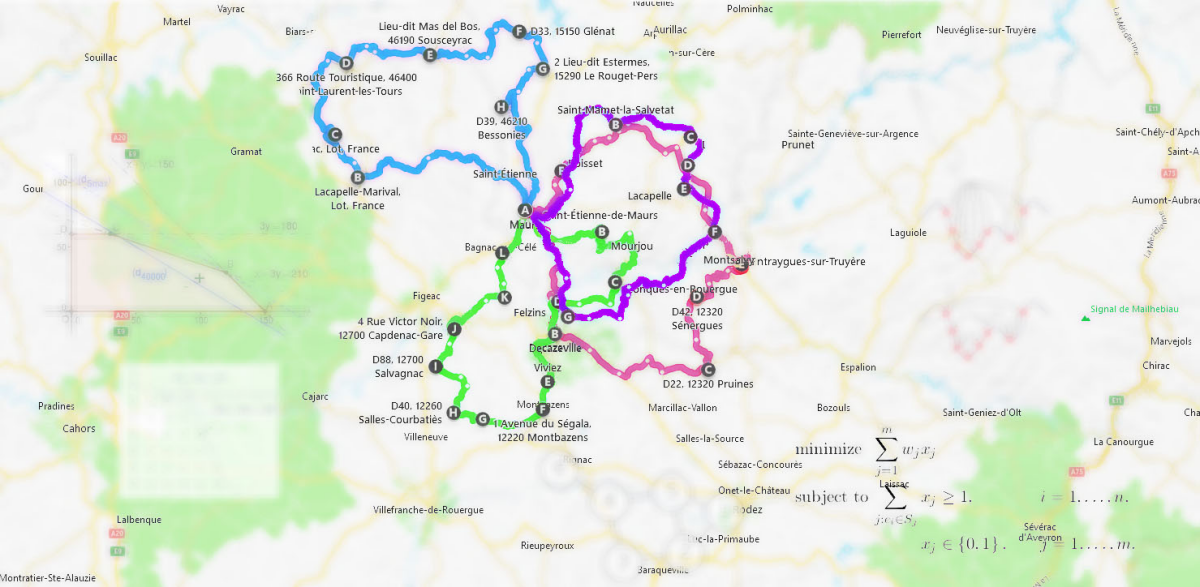

### PSO (Particle Swarm Optimization) pour le TSP (Traveling Salesman Problem)

1. Initialisation
- Une population de particules est créée, chaque particule représentant une séquence de villes.
- Chaque particule a une position (tournée) et une vélocité (influence sur les mises à jour de la position).

2. Mise à jour des Particules
- Les positions sont mises à jour en fonction des meilleures positions locales et globales.
- Utilisation des coefficients d'inertie (w), cognitif (c1) et social (c2) pour ajuster les vélocités.
- Un opérateur de permutation assure que chaque ville est visitée une seule fois.

3. Calcul du Coût
- Le coût de chaque tournée est calculé comme la somme des distances parcourues, incluant le retour au point de départ.

4. Optimisation
- Les particules ajustent leurs positions pour minimiser le coût total.
- La meilleure position globale est mise à jour à chaque itération.

5. Division des Routes
- La meilleure tournée trouvée est divisée équitablement entre les véhicules.
- Chaque segment de route revient au point de départ, respectant les contraintes de visite unique et de continuité.


In [ ]:
import numpy as np
import networkx as nx
import random

class Particle:
    def __init__(self, position):
        # Initialisation de la particule avec position et vitesse initiales.
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = np.copy(position)
        self.best_score = float('inf')

def initialize_population(size, num_cities):
    population = []
    for _ in range(size):
        # Création de la position initiale de la particule par permutation aléatoire des villes.
        position = np.random.permutation(num_cities)
        population.append(Particle(position))
    return population

def calculate_route_cost(route, distances):
    # Calcul du coût total de la route basée uniquement sur les distances.
    cost = 0
    for i in range(len(route) - 1):
        cost += distances[route[i], route[i + 1]]
    cost += distances[route[-1], route[0]]  # Retour au point de départ.
    return cost

def update_velocity_and_position(particle, global_best_position, w=0.1, c1=0.5, c2=0.9):
    # Mise à jour de la vitesse et position de la particule.
    r1, r2 = random.random(), random.random()
    cognitive = c1 * r1 * (particle.best_position - particle.position)
    social = c2 * r2 * (global_best_position - particle.position)
    particle.velocity = w * particle.velocity + cognitive + social
    
    # Mise à jour de la position avec la nouvelle vélocité
    particle.position = np.mod(particle.position + particle.velocity.astype(int), len(particle.position))
    
    # Assurer que chaque ville est visitée exactement une fois
    unique_positions = np.unique(particle.position)
    if len(unique_positions) < len(particle.position):
        missing_positions = set(range(len(particle.position))) - set(unique_positions)
        for idx in range(len(particle.position)):
            if particle.position[idx] in unique_positions:
                continue
            particle.position[idx] = missing_positions.pop()

def calculate_total_distance(route, distances):
    # Convertir les noms des nœuds en indices
    route_indices = [list(G.nodes()).index(node) for node in route]
    total_distance = 0
    for i in range(len(route_indices) - 1):
        total_distance += distances[route_indices[i], route_indices[i + 1]]
    total_distance += distances[route_indices[-1], route_indices[0]]  # Retour au point de départ
    return total_distance

def pso(G, num_iterations, num_vehicles):
    # Préparation de l'algorithme PSO.
    distances = nx.floyd_warshall_numpy(G)
    num_cities = len(G.nodes)
    population = initialize_population(30, num_cities)
    global_best_position = None
    global_best_score = float('inf')

    for _ in range(num_iterations):
        for particle in population:
            cost = calculate_route_cost(particle.position, distances)
            if cost < particle.best_score:
                particle.best_score = cost
                particle.best_position = np.copy(particle.position)
            if cost < global_best_score:
                global_best_score = cost
                global_best_position = particle.position
        for particle in population:
            update_velocity_and_position(particle, global_best_position)

    best_route = [list(G.nodes())[i] for i in global_best_position]
    
    # Diviser la meilleure route en fonction du nombre de camions
    routes = []
    route_length = len(best_route) // num_vehicles
    for i in range(num_vehicles):
        start_index = i * route_length
        if i == num_vehicles - 1:  # Le dernier camion prend le reste des villes
            routes.append(best_route[start_index:])
        else:
            routes.append(best_route[start_index:start_index + route_length])
    
    # Assurer que chaque route revient au point de départ
    for route in routes:
        if route[-1] != route[0]:
            route.append(route[0])

    return routes, global_best_score

# Utilisation de l'algorithme PSO sur le graphe G
best_pso_routes, best_pso_distance = pso(G, 100, G.graph['num_vehicles'])
print("Meilleures routes par camion:", best_pso_routes)
print("Distance totale :", best_pso_distance)

# Correction pour utiliser les indices des nœuds
for idx, route in enumerate(best_pso_routes):
    total_distance_pso = calculate_total_distance(route, distances)
    print(f"Distance totale parcourue par le camion {idx + 1} : {total_distance_pso}")


### Algorithme de Dijkstra pour les chemins les plus courts

Dijkstra est utilisé pour trouver les chemins les plus courts entre un nœud de départ et tous les autres nœuds dans un graphe pondéré.
Étapes de l'algorithme :
1. Initialisation : Définir la distance au nœud de départ à 0 et à l'infini pour tous les autres nœuds.
2. Utiliser une file de priorité pour gérer les nœuds à explorer, en commençant par le nœud de départ.
3. Pour chaque nœud extrait de la file, mettre à jour la distance de ses voisins si un chemin plus court à travers ce nœud est trouvé.
4. Continuer le processus jusqu'à ce que tous les nœuds accessibles soient explorés et que leurs distances minimales soient déterminées.
5. Le résultat est un dictionnaire des distances les plus courtes depuis le nœud de départ vers tous les autres nœuds accessibles.


In [ ]:
import heapq
import networkx as nx

def dijkstra(graph, start_vertex):
    # Initialiser les distances de tous les sommets à l'infini
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start_vertex] = 0  # La distance au sommet de départ est zéro

    # File de priorité pour gérer les sommets à explorer
    priority_queue = [(0, start_vertex)]
    previous_nodes = {vertex: None for vertex in graph}  # Pour tracer le chemin de retour

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # Explorer tous les voisins du sommet courant
        for neighbor in graph.neighbors(current_vertex):
            distance = current_distance + graph[current_vertex][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances, previous_nodes

def find_routes_from_dijkstra(graph, previous_nodes, num_vehicles, start_vertex):
    paths = {vertex: [] for vertex in graph.nodes()}
    distances = {vertex: float('infinity') for vertex in graph.nodes()}
    
    # Calcul des chemins à partir des nœuds précédents
    for vertex in graph.nodes():
        path = []
        current = vertex
        distance = 0
        while current is not None:
            path.append(current)
            next_node = previous_nodes[current]
            if next_node is not None and graph.has_edge(current, next_node):
                distance += graph[current][next_node]['weight']
            current = next_node
        path.reverse()
        if start_vertex in path:
            paths[vertex] = path[path.index(start_vertex):]
            distances[vertex] = distance

    vehicle_paths = [[] for _ in range(num_vehicles)]
    vertices = sorted(graph.nodes(), key=lambda v: distances[v] if v in distances else float('inf'))

    for i, vertex in enumerate(vertices):
        if vertex != start_vertex and graph.has_edge(start_vertex, vertex):  
            assigned_vehicle = i % num_vehicles
            vehicle_paths[assigned_vehicle].extend(paths[vertex] if vertex in paths else [vertex])
    
    # Ajout de point de départ et d'arrivée à chaque itinéraire
    for path in vehicle_paths:
        if path and path[0] != start_vertex:
            path.insert(0, start_vertex)
        if path and path[-1] != start_vertex:
            path.append(start_vertex)
    
    # Calculer les distances totales
    final_routes = []
    total_distances = []
    for route in vehicle_paths:
        total_distance = 0
        for i in range(len(route) - 1):
            if graph.has_edge(route[i], route[i + 1]):
                total_distance += graph[route[i]][route[i + 1]]['weight']
            else:
                print(f"Arête manquante: {route[i]} -> {route[i + 1]}")
        final_routes.append(route)
        total_distances.append(total_distance)
    
    return final_routes, total_distances


# Utilisation de l'algorithme avec gestion des camions
if 'num_vehicles' in G.graph:
    num_dijkstra_vehicles = G.graph['num_vehicles']
    start_vertex = next(iter(G.nodes))  # Premier nœud disponible dans le graphe
    dijkstra_distances, dijkstra_previous_nodes = dijkstra(G, start_vertex)
    dijkstra_routes, dijkstra_total_distances = find_routes_from_dijkstra(G, dijkstra_previous_nodes, num_dijkstra_vehicles, start_vertex)

    total_dijkstra_distance_all_trucks = sum(dijkstra_total_distances)  # Calcul de la distance totale parcourue par tous les camions

    for idx, (dijkstra_route, dist) in enumerate(zip(dijkstra_routes, dijkstra_total_distances)):
        print(f"Itinéraire pour le camion {idx + 1} : {dijkstra_route}")
        print(f"Distance totale parcourue par le camion {idx + 1} : {dist}")

    print(f"Distance totale parcourue par tous les camions : {total_dijkstra_distance_all_trucks}")
else:
    print("Les données des véhicules ne sont pas disponibles dans le graphe.")


### Optimisation avec PuLP et le Solveur Simplex
Ce modèle utilise PuLP, une bibliothèque de programmation linéaire en Python, pour résoudre le VRP, qui consiste à minimiser la distance totale parcourue tout en s'assurant que chaque ville est visitée exactement une fois par un seul véhicule, et que chaque véhicule commence et termine sa tournée au dépôt.

#### Étapes de l'implémentation :
1. Définition des données du problème : Les villes sont représentées par les nœuds d'un graphe, et le nombre total de villes est extrait.
2. Récupération des données du graphe : Le nombre de véhicules et leurs capacités sont obtenus à partir des attributs du graphe (si appliqué, les capacités sont utilisées pour d'autres contraintes complexes non traitées ici).
3. Création du modèle : Un problème de minimisation est configuré avec PuLP.
4. Définition des variables de décision : Variables binaires pour chaque possible lien entre villes pour chaque véhicule.
5. Fonction objectif : Minimiser la distance totale parcourue basée sur les distances pré-calculées entre les villes.
6. Ajout de contraintes :
   - Chaque ville doit être visitée par un et un seul véhicule.
   - Chaque véhicule doit retourner au dépôt après avoir terminé sa tournée.
   - Assurer la continuité de la tournée pour chaque véhicule.
7. Résolution du modèle : Le modèle est résolu en utilisant le solveur linéaire intégré à PuLP.
8. Extraction et affichage des résultats : Les itinéraires pour chaque véhicule sont construits et la distance totale parcourue est calculée.


In [38]:
import pulp
import networkx as nx
import numpy as np
import time


def Simplex(numberOfVehicles):
    cities = list(G.nodes)
    num_cities = len(cities)

    if numberOfVehicles == 0:
        num_vehicles = G.graph['num_vehicles']
    else:
        num_vehicles = numberOfVehicles
    print(f"Nombre de véhicules utilisés: {num_vehicles}")

    model = pulp.LpProblem("VRP", pulp.LpMinimize)

    x = pulp.LpVariable.dicts('x', ((i, j, k) for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles)), cat='Binary')
    u = pulp.LpVariable.dicts('u', (i for i in range(num_cities)), lowBound=0, cat='Continuous')

    distances = nx.floyd_warshall_numpy(G)
    model += pulp.lpSum(distances[i][j] * x[(i, j, k)] for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles))

    for j in range(1, num_cities):
        model += pulp.lpSum(x[(i, j, k)] for i in range(num_cities) for k in range(num_vehicles)) == 1

    for k in range(num_vehicles):
        model += pulp.lpSum(x[(0, j, k)] for j in range(1, num_cities)) == 1
        model += pulp.lpSum(x[(i, 0, k)] for i in range(1, num_cities)) == 1

    for i in range(1, num_cities):
        for k in range(num_vehicles):
            model += pulp.lpSum(x[(i, j, k)] for j in range(num_cities)) - pulp.lpSum(x[(j, i, k)] for j in range(num_cities)) == 0

    start_time = time.time()
    model.solve()
    end_time = time.time()
    
    execution_time = end_time - start_time

    print("Statut de la solution:", pulp.LpStatus[model.status])
    print(f"Temps de résolution : {execution_time} secondes")

    total_distance_all_trucks_pulp = 0
    if pulp.LpStatus[model.status] == 'Optimal':
        pulp_routes = [[] for _ in range(num_vehicles)]
        for k in range(num_vehicles):
            for i in range(num_cities):
                for j in range(num_cities):
                    if pulp.value(x[(i, j, k)]) == 1:
                        pulp_routes[k].append((cities[i], cities[j]))

        for k, route in enumerate(pulp_routes):
            if route:
                itineraire_camion_pulp = [route[0][0]]
                distance_total_camion_pulp = 0
                last_node_pulp = route[0][0]

                for i, j in route:
                    if i != last_node_pulp:
                        itineraire_camion_pulp.append(i)
                    distance_total_camion_pulp += distances[cities.index(i)][cities.index(j)]
                    last_node_pulp = j

                itineraire_camion_pulp.append(route[-1][1])
                distance_total_camion_pulp += distances[cities.index(route[-1][1])][cities.index(route[0][0])]

                total_distance_all_trucks_pulp += distance_total_camion_pulp
                print(f"Itinéraire pour le camion {k + 1} : {itineraire_camion_pulp}")
                print(f"Distance totale parcourue par le camion {k + 1} : {distance_total_camion_pulp}")
        print(f"Distance totale parcourue par tous les camions : {total_distance_all_trucks_pulp}")
    
    else:
        total_distance_all_trucks_pulp = float('inf')
    
    return execution_time, total_distance_all_trucks_pulp, pulp_routes


Simplex(4)


Nombre de véhicules utilisés: 4
Statut de la solution: Optimal
Temps de résolution : 3.4330108165740967 secondes
Itinéraire pour le camion 1 : [1, 2, 3, 5, 6, 8, 14, 17, 18, 19, 21, 25, 29, 35, 38, 41, 46, 48, 50, 52, 56, 61, 66, 68, 70, 71, 75, 76, 83, 89, 96, 101, 102, 103, 107, 111, 112, 116, 116]
Distance totale parcourue par le camion 1 : 494.5833663530987
Itinéraire pour le camion 2 : [1, 7, 9, 11, 23, 30, 31, 37, 49, 60, 67, 69, 72, 74, 79, 81, 82, 87, 88, 94, 98, 99, 100, 104, 108, 117, 117]
Distance totale parcourue par le camion 2 : 279.3287395962288
Itinéraire pour le camion 3 : [1, 12, 13, 15, 40, 42, 44, 45, 47, 51, 53, 55, 57, 58, 62, 63, 64, 65, 73, 77, 85, 90, 91, 95, 109, 113, 113]
Distance totale parcourue par le camion 3 : 609.243161942607
Itinéraire pour le camion 4 : [1, 10, 16, 20, 22, 24, 26, 27, 28, 32, 33, 34, 36, 39, 43, 54, 59, 78, 80, 84, 86, 92, 93, 97, 105, 106, 110, 114, 115, 115]
Distance totale parcourue par le camion 4 : 395.6704049044098
Distance tota

(3.4330108165740967,
 1778.8256727963444,
 [[(1, 76),
   (2, 2),
   (3, 3),
   (5, 5),
   (6, 6),
   (8, 8),
   (14, 14),
   (17, 17),
   (18, 18),
   (19, 19),
   (21, 21),
   (25, 25),
   (29, 29),
   (35, 35),
   (38, 38),
   (41, 41),
   (46, 46),
   (48, 48),
   (50, 50),
   (52, 52),
   (56, 56),
   (61, 61),
   (66, 66),
   (68, 68),
   (70, 70),
   (71, 71),
   (75, 75),
   (76, 1),
   (83, 83),
   (89, 89),
   (96, 96),
   (101, 101),
   (102, 102),
   (103, 103),
   (107, 107),
   (111, 111),
   (112, 112),
   (116, 116)],
  [(1, 69),
   (7, 7),
   (9, 9),
   (11, 11),
   (23, 23),
   (30, 30),
   (31, 31),
   (37, 37),
   (49, 49),
   (60, 60),
   (67, 67),
   (69, 1),
   (72, 72),
   (74, 74),
   (79, 79),
   (81, 81),
   (82, 82),
   (87, 87),
   (88, 88),
   (94, 94),
   (98, 98),
   (99, 99),
   (100, 100),
   (104, 104),
   (108, 108),
   (117, 117)],
  [(1, 47),
   (12, 12),
   (13, 13),
   (15, 15),
   (40, 40),
   (42, 42),
   (44, 44),
   (45, 45),
   (47, 1),
   (5

## V. Visualisation des Résultats

La visualisation des routes générées par les différents algorithmes permet de mieux comprendre la qualité des solutions et les différences entre les méthodes. Les graphiques montrent clairement les routes prises par les véhicules, facilitant ainsi l'analyse des résultats.

Les figures ci-dessous montrent les routes trouvées par les algorithmes Dijkstra, PSO et PuLP. Les lignes rouges représentent les chemins empruntés par les véhicules, et les nœuds représentent les villes.

### Visualisation de la meilleure route PSO


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def visualize_best_routes(G, best_routes):
    pos = nx.spring_layout(G, seed=42)  # Utiliser un layout reproductible
    
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edge_color='gray', style='dashed')

    num_trucks = len(best_routes)  # Utiliser le nombre de routes fournies comme nombre de camions
    colors = plt.get_cmap('viridis')(np.linspace(0, 1, num_trucks))  # Obtenir une gamme de couleurs

    for idx, route in enumerate(best_routes):
        if route:  # S'assurer que la route n'est pas vide
            # Filtrer les nœuds qui existent dans G et pos
            filtered_route = [node for node in route if node in G.nodes and node in pos]
            if len(filtered_route) < 2:
                continue
            route_edges = [(filtered_route[i], filtered_route[i+1]) for i in range(len(filtered_route)-1)]
            nx.draw_networkx_edges(G, pos, edgelist=route_edges, edge_color=colors[idx], width=4, alpha=0.9)

    handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(num_trucks)]
    labels = [f'Camion {i+1}' for i in range(num_trucks)]
    plt.legend(handles, labels, loc='upper right', title="Légende des camions")

    plt.title("Visualisation des Meilleures Routes PSO")
    plt.show()

# Utilisation de la fonction de visualisation avec G et best_routes
visualize_best_routes(G, best_pso_routes)


### Visualisation des chemins les plus courts par Dijkstra

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Fonction de visualisation des routes pour Dijkstra
def visualize_dijkstra_routes(graph, routes):
    pos = nx.spring_layout(graph, seed=42)  # Utiliser un layout reproductible
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(graph, pos)
    nx.draw_networkx_edges(graph, pos, edge_color='gray', style='dashed')

    num_trucks = len(routes)  # Utiliser le nombre de routes fournies comme nombre de camions
    colors = plt.get_cmap('viridis')(np.linspace(0, 1, num_trucks))  # Obtenir une gamme de couleurs

    for idx, route in enumerate(routes):
        if route:  # S'assurer que la route n'est pas vide
            # Filtrer les nœuds qui existent dans graph et pos
            filtered_route = [node for node in route if node in graph.nodes and node in pos]
            if len(filtered_route) < 2:
                continue
            route_edges = [(filtered_route[i], filtered_route[i+1]) for i in range(len(filtered_route)-1)]
            nx.draw_networkx_edges(graph, pos, edgelist=route_edges, edge_color=colors[idx], width=4, alpha=0.9)

    handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(num_trucks)]
    labels = [f'Camion {i+1}' for i in range(num_trucks)]
    plt.legend(handles, labels, loc='upper right', title="Légende des camions")

    plt.title("Visualisation des Routes Optimisées de Dijkstra")
    plt.show()

# Appel de la fonction de visualisation pour Dijkstra
visualize_dijkstra_routes(G, dijkstra_routes)


### Visualisation pour l'Optimisation de PuLP et le Solveur Simplex

Visualisation pour 3 camions.


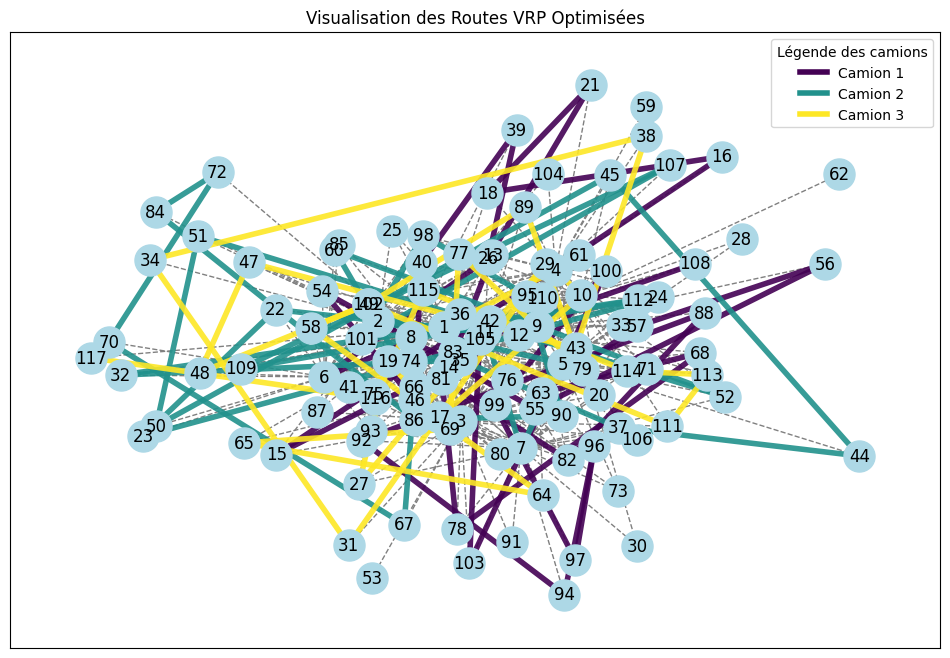

In [41]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def visualize_vrp_routes(graph):
    node_positions = nx.spring_layout(graph, seed=42)  # Utiliser un layout reproductible

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(graph, node_positions, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(graph, node_positions)
    nx.draw_networkx_edges(graph, node_positions, edge_color='gray', style='dashed')

    num_trucks = len(pulp_routes)  # Afficher toutes les routes générées
    colors = plt.get_cmap('viridis')(np.linspace(0, 1, num_trucks))

    print(f"Visualisation pour {num_trucks} camions.")

    for idx, route in enumerate(pulp_routes):
        if route:  # S'assurer que la route n'est pas vide
            route_edges = [(route[i][0], route[i+1][0]) for i in range(len(route)-1)]
            nx.draw_networkx_edges(graph, node_positions, edgelist=route_edges, edge_color=colors[idx], width=4, alpha=0.9)

    handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(num_trucks)]
    labels = [f'Camion {i+1}' for i in range(num_trucks)]
    plt.legend(handles, labels, loc='upper right', title="Légende des camions")

    plt.title("Visualisation des Routes VRP Optimisées")
    plt.show()

visualize_vrp_routes(G)


## VII. Conclusion

Ce projet a évalué différentes stratégies pour optimiser les tournées de livraison en milieu urbain, un défi central pour l'amélioration de la logistique et la réduction de l'empreinte carbone. Nos expérimentations avec divers algorithmes montrent qu'il n'existe pas de solution unique répondant à tous les scénarios, chaque méthode ayant des points forts spécifiques selon les exigences du problème.

### Contributions Principales
- **Algorithme PSO** : Il s'est révélé rapide et efficace pour générer de bonnes solutions sur de grands ensembles de données, adapté pour les situations demandant rapidité et flexibilité.
- **Algorithme de Dijkstra** : Excellent pour calculer les itinéraires les plus courts, son efficacité diminue néanmoins avec l'augmentation de la taille du réseau.
- **PuLP et Solveur Simplex** : Ces outils sont parfaits pour obtenir des résultats précis dans des cas de taille réduite, permettant de valider les approximations fournies par des approches heuristiques.

### Perspectives Futures
Pour améliorer davantage notre approche, nous envisageons :
- D'optimiser les heuristiques existantes pour augmenter leur efficacité, surtout pour les problèmes à très grande échelle.
- De mettre en œuvre des techniques de calcul parallèle pour accélérer le traitement des données et des simulations.
- D'explorer de nouvelles contraintes et objectifs pour adapter nos modèles aux réalités variées de la logistique urbaine moderne.

En continuant à développer et à affiner ces algorithmes, nous espérons non seulement améliorer la gestion logistique mais aussi contribuer significativement à la durabilité environnementale des villes.

## VII. Statistique

In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def generate_data():
    data = {
        'Number_of_Vehicles': [],
        'Execution_Time': [],
        'Total_Distance': []
    }
    
    for num_vehicles in range(1, 7):  # Tester pour 1 à 10 véhicules
        exec_time, total_dist = Simplex(num_vehicles)
        data['Number_of_Vehicles'].append(num_vehicles)
        data['Execution_Time'].append(exec_time)
        data['Total_Distance'].append(total_dist)
        
    return pd.DataFrame(data)

# Générer les données
df = generate_data()

# Visualisation avec Seaborn
sns.set(style="whitegrid")

# Plot du temps d'exécution
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(x='Number_of_Vehicles', y='Execution_Time', data=df, marker='o')
plt.title('Temps d\'exécution en fonction du nombre de véhicules')
plt.xlabel('Nombre de véhicules')
plt.ylabel('Temps d\'exécution (secondes)')

# Plot de la distance totale parcourue
plt.subplot(1, 2, 2)
sns.lineplot(x='Number_of_Vehicles', y='Total_Distance', data=df, marker='o', color='orange')
plt.title('Distance totale parcourue en fonction du nombre de véhicules')
plt.xlabel('Nombre de véhicules')
plt.ylabel('Distance totale parcourue')

plt.tight_layout()
plt.show()

Nombre de véhicules utilisés: 1
Statut de la solution: Optimal
Temps de résolution : 0.6288013458251953 secondes
Itinéraire pour le camion 1 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 117]
Distance totale parcourue par le camion 1 : 168.89987835782972
Distance totale parcourue par tous les camions : 168.89987835782972


ValueError: too many values to unpack (expected 2)